## 1. Data
### 1.1. Input Data
The data "EGC_Post.csv" contains IPOs from April 5, 2012 (i.e., after the JOBS Act) to 2015. The sample only includes Emerging Growth Companies (EGCs), IPOs with revenues below $1B, because they are the only ones that are allowed to reduce financial disclosure.

### 1.2. Variable definition
- *gvkey*: firm identifier
- *IPOYear*: year of the IPO
- *ReducedDisclosure*: target class; 1 if reduced financial disclosure; 0 otherwise
- *LogAge*: Natural logarithm of firm age 
- *LogAsset*: Natural logarithm of the dollar amount of total assets
- *LogOnePlusRevt*: Natural logarithm of one plus revenues
- *LogProceeds*: Natural logarithm of total dollar gross proceeds
- *PercentSharesRetained*: Fraction of shares outstanding in the company that is retained by
pre-IPO shareholders
- *OfferPriceRevision*: Percentage change in offer price from the midpoint of the
preliminary offer price range
- *LogDaysInRegistration*: Natural logarithm of the number of days between the S-1 filing
date and the IPO date
- *ReturnOnAssets*: Net income divided by total assets
- *RD*: R&D expense divided by total assets
- *CapitalExpenditures*: Capital expenditure divided by total assets
- *NegativeROA*: An indicator variable that = 1 if the company reports negative
net income
- *NegativeBVE*: An indicator variable that = 1 if the company reports negative
book value of equity
- *PositiveRD*: An indicator variable that = 1 if the company reports positive
R&D expense
- *VentureBacked*: An indicator variable = 1 if the issuer has venture-capital
backing
- *TechIndustry*: An indicator variable = 1 if the issuer is in the Internet Software
& Services industry (GICS Code 451010) or the Software industry
(GICS Code 451030)
- *BiotechPharmaIndustry*: An indicator variable = 1 if the issuer is in the Biotechnology
industry (GICS Code 352010) or the Pharmaceutical industry
(GICS Code 352020)
- *Nasdaq*: An indicator variable = 1 if the issuer is listed on NASDAQ
- *NYSE*: An indicator variable = 1 if the issuer is listed on NYSE
- *Underwriters*: An indicator variable that = 1 if Loughran and Ritter’s (2004)
IPO underwriter rank score is = 9
- *Big4*: An indicator variable = 1 if the issuer is audited by Deloitte,
Ernest & Young, KPMG, or PwC
- *NIPO*: Number of IPOs in registration in the 90 days prior to the IPO. 
- *NasdaqPrior90Ret*: Average buy-and-hold return of all NASDAQ-traded stocks
during the 90 days prior to the IPO

## 2. Implementation of Customer Churn Prediction
### 2.1. Setup
#### 2.1.1. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#### 2.2 Read the CSV File 

In [8]:
# Read the CSV file
disclosure_df = pd.read_csv("EGC_Post.csv")

### 2.2. Exploratory Data Analysis (EDA)

In [9]:
# View the first 5 entries
disclosure_df.head()

,gvkey,IPOYear,ReducedDisclosure,LogAge,LogAsset,LogOnePlusRevt,LogProceeds,PercentSharesRetained,OfferPriceRevision,LogDaysInRegistration,...,PositiveRD,VentureBacked,TechIndustry,BiotechPharmaIndustry,Nasdaq,NYSE,Underwriters,Big4,NIPO,NasdaqPrior90Ret
0,171141,2012,0,2.397895,4.901765,5.697473,5.102667,0.826460,0.062500,4.510860,...,0,0,0,0,1,0,1,1,14,-0.007962
1,171067,2012,0,2.079442,4.512748,4.784128,5.566052,0.908191,0.076923,4.644391,...,1,1,0,0,0,1,1,1,14,-0.001697
2,11922,2012,0,4.007333,4.368371,5.581781,4.683427,0.687737,0.071429,3.583519,...,0,0,0,0,0,1,0,1,14,-0.027582
3,171097,2012,0,1.945910,2.097036,0.000000,3.931826,0.684384,-0.166667,4.634729,...,1,1,0,1,1,0,0,1,14,-0.046843
4,170965,2012,0,3.610918,5.205648,5.099708,4.406719,0.800660,-0.307692,3.610918,...,0,0,0,0,1,0,1,1,15,0.002627


In [10]:
# View info
disclosure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gvkey                  380 non-null    int64  
 1   IPOYear                380 non-null    int64  
 2   ReducedDisclosure      380 non-null    int64  
 3   LogAge                 380 non-null    float64
 4   LogAsset               380 non-null    float64
 5   LogOnePlusRevt         380 non-null    float64
 6   LogProceeds            380 non-null    float64
 7   PercentSharesRetained  380 non-null    float64
 8   OfferPriceRevision     380 non-null    float64
 9   LogDaysInRegistration  380 non-null    float64
 10  ReturnOnAssets         380 non-null    float64
 11  RD                     380 non-null    float64
 12  CapitalExpenditures    380 non-null    float64
 13  NegativeROA            380 non-null    int64  
 14  NegativeBVE            380 non-null    int64  
 15  Positi

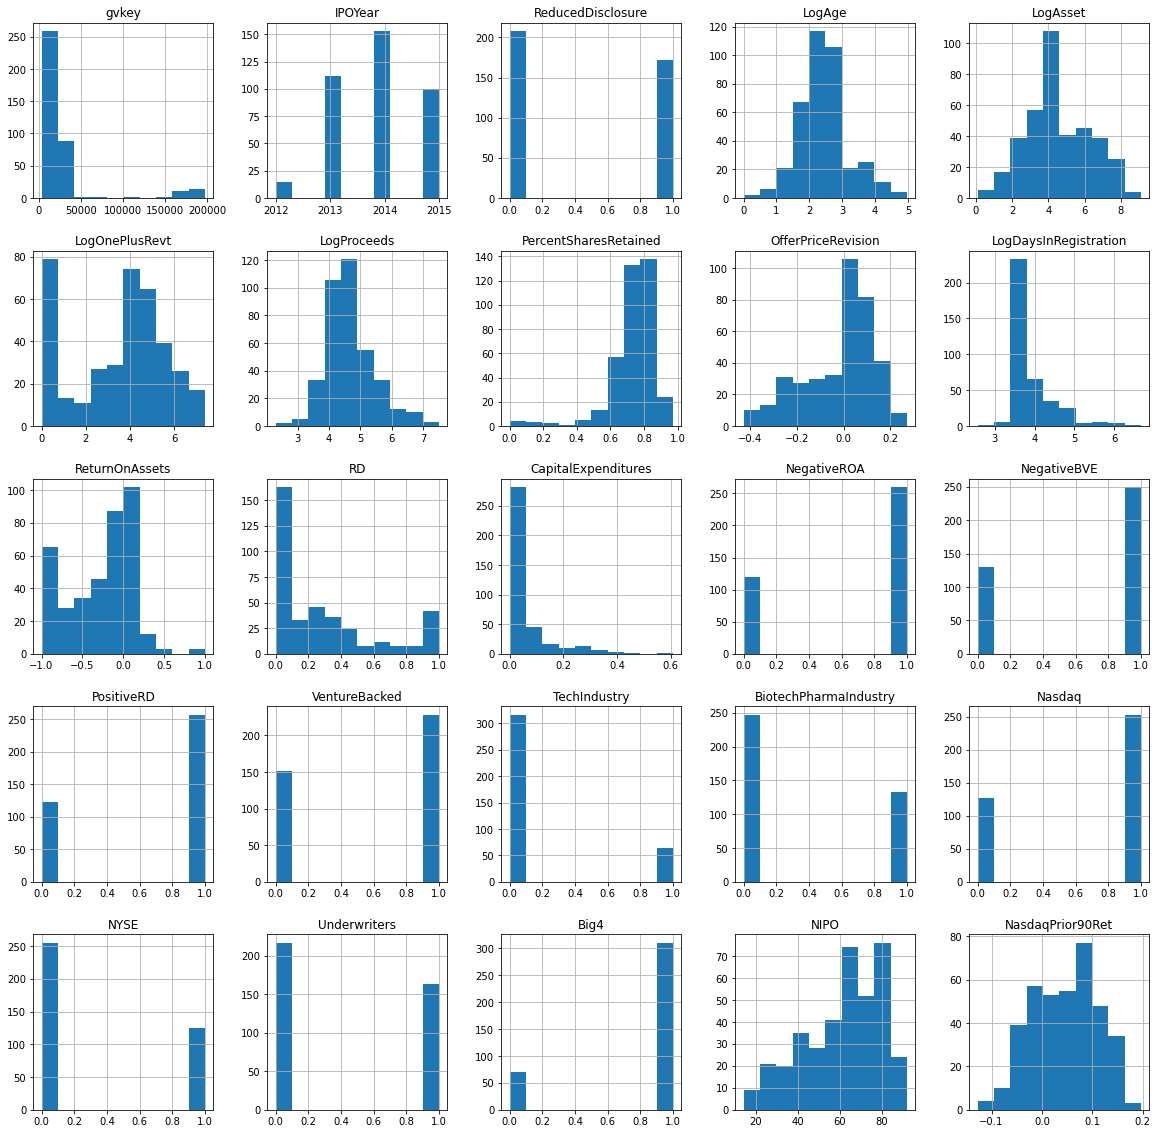

In [12]:
# View histogram
disclosure_df.hist(figsize = (20,20))
plt.show()

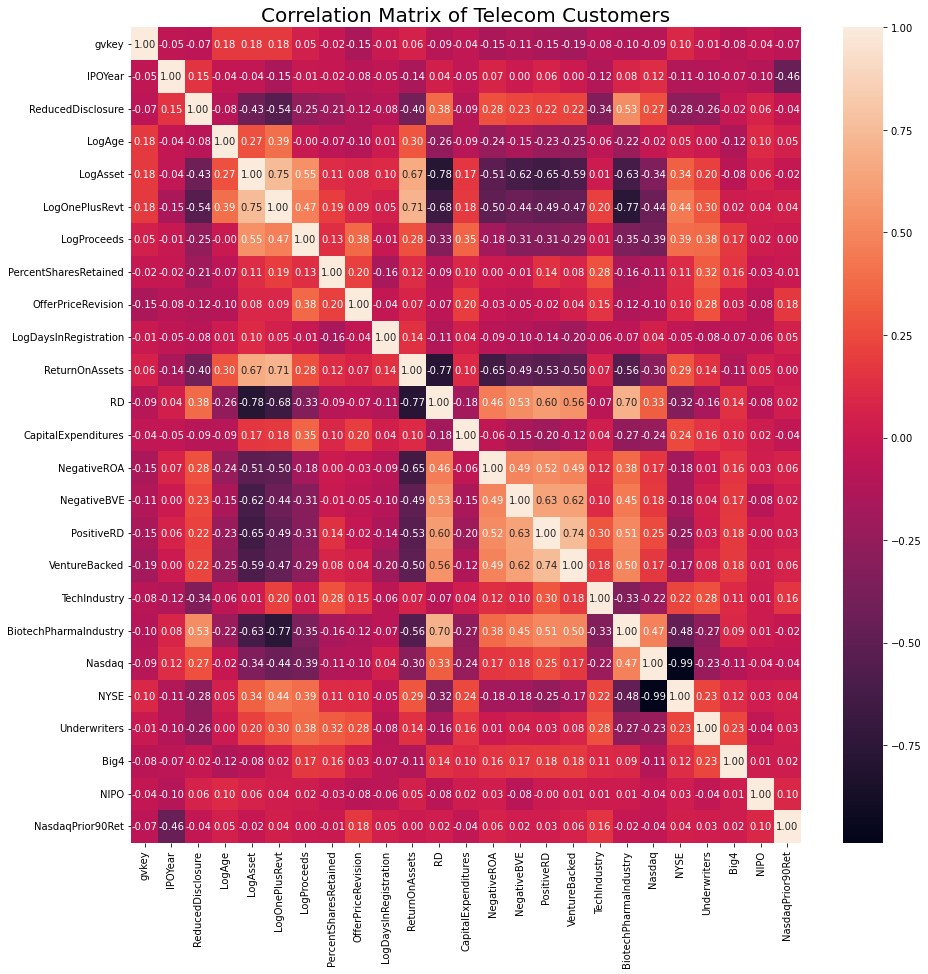

In [13]:
corr_matrix = disclosure_df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

### Prepare the data

In [15]:
# Features and label
X = disclosure_df.drop(["gvkey", "ReducedDisclosure"], axis = "columns")
y = disclosure_df["ReducedDisclosure"]

In [16]:
X.shape

(380, 23)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304, 23), (76, 23), (304,), (76,))

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel()) # .values.ravel

RandomForestClassifier()

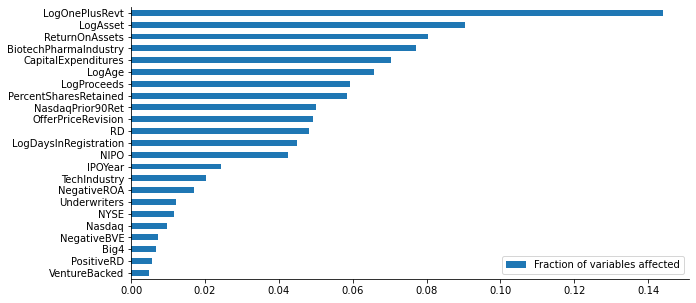

In [20]:
feat_scores = pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_}, index = X.columns)
feat_scores = feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [23]:
y_predict = model_LR.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        47
           1       0.77      0.83      0.80        29

    accuracy                           0.84        76
   macro avg       0.83      0.84      0.83        76
weighted avg       0.85      0.84      0.84        76



<AxesSubplot:>

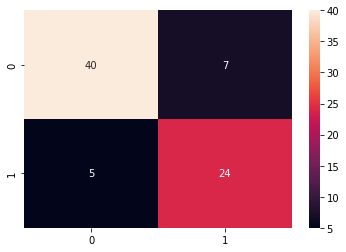

In [25]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = '.0f')

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
y_predict = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))